# Анализ ценообразования автомобилей с использованием линейной регрессии

## Цель проекта:
- Предсказать стоимость автомобилей на основе их характеристик.
- Определить, какие факторы (предикторы) оказывают наибольшее влияние на цену.

## Задачи:
1. Загрузить и изучить данные, проверить наличие пропущенных значений и типы переменных.
2. Создать новый признак – марка автомобиля.
3. Отобрать важные предикторы и рассчитать корреляцию между `price` и другими переменными.
4. Преобразовать категориальные переменные с помощью `pd.get_dummies()`.
5. Построить линейную регрессионную модель:
   - С одним предиктором (`horsepower`).
   - С несколькими предикторами (все важные признаки).
6. Сравнить модели по метрике \( R^2 \) и выбрать оптимальную.
7. Заполнить выводы по результатам анализа.

## Используемые инструменты:
- Python (Pandas, NumPy, Statsmodels, Matplotlib, Seaborn)
- Методы статистического анализа и машинного обучения (линейная регрессия)

## Результат:
[Добавить сюда финальные выводы по проекту после выполнения].

In [25]:
# Блок 1: Импорты библиотек

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm  # Для статистического моделирования
import statsmodels.formula.api as smf  # Для работы с регрессионными формулами
import matplotlib.pyplot as plt  # Для построения графиков

In [26]:
# Блок 2: Загрузка данных и предварительный анализ
cars = pd.read_csv("../analytics/cars.csv")

In [27]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [28]:
unique_car_names = cars['CarName'].nunique()
print(f"Количество уникальных наименований автомобилей: {unique_car_names}")

Количество уникальных наименований автомобилей: 147


In [29]:
# Блок 3: Проверка данных и удаление ненужных столбцов

# Создание нового признака 'company' на основе 'CarName'
# Мы выделяем название компании из полного наименования автомобиля
# Используем метод apply() для применения лямбда-функции

cars['company'] = cars['CarName'].apply(lambda x: x.split(' ')[0])

In [30]:
cars.sample(7)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
55,56,3,mazda 626,gas,std,two,hatchback,rwd,front,95.3,...,4bbl,3.33,3.255,9.4,101,6000,17,23,10945.0,mazda
43,44,0,isuzu MU-X,gas,std,four,sedan,rwd,front,94.3,...,2bbl,3.31,3.230,8.5,78,4800,24,29,6785.0,isuzu
44,45,1,isuzu D-Max,gas,std,two,sedan,fwd,front,94.5,...,2bbl,3.03,3.110,9.6,70,5400,38,43,8916.5,isuzu
50,51,1,maxda rx3,gas,std,two,hatchback,fwd,front,93.1,...,2bbl,3.03,3.150,9.0,68,5000,30,31,5195.0,maxda
112,113,0,peugeot 604sl,diesel,turbo,four,sedan,rwd,front,107.9,...,idi,3.70,3.520,21.0,95,4150,28,33,16900.0,peugeot
27,28,1,dodge coronet custom,gas,turbo,two,sedan,fwd,front,93.7,...,mpfi,3.03,3.390,7.6,102,5500,24,30,8558.0,dodge
166,167,1,toyota corolla tercel,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,3.24,3.080,9.4,112,6600,26,29,9538.0,toyota


In [31]:
# Удаление ненужного столбца 'car_ID'
# Столбец 'car_ID' является идентификатором и не несёт полезной информации для анализа
cars.drop(columns=['car_ID'], inplace=True)

In [32]:
print(f"Количество уникальных марок автомобилей: {cars['company'].nunique()}")

Количество уникальных марок автомобилей: 28


In [33]:
# Блок 4: Стандартизация и исправление данных в столбце 'company'

In [34]:
# Шаг 1: Приведение значений столбца 'company' к нижнему регистру
cars['company'] = cars.company.str.lower()

In [35]:
# Функция для исправления опечаток
def fix_company(to_rep, how_rep):
    cars['company'].replace(to_rep, how_rep, inplace=True)

# Исправляем опечатки в названиях компаний
fix_company('vw', 'volkswagen')
fix_company('vokswagen', 'volkswagen')
fix_company('toyouta', 'toyota')
fix_company('porshce', 'porsche')
fix_company('maxda', 'mazda')

# Проверяем уникальные значения
print("Исправленные уникальные марки автомобилей:")
print(cars['company'].unique())

Исправленные уникальные марки автомобилей:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


In [38]:
columns_to_keep = ['company', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype',
'cylindernumber', 'enginesize', 'boreratio','horsepower', 'price']

In [39]:
columns_to_keep

['company',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'horsepower',
 'price']

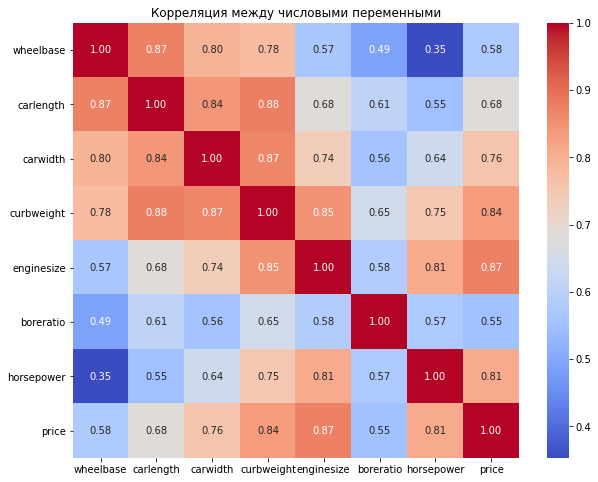

In [42]:
# Считаем корреляцию между всеми числовыми столбцам
df = cars[columns_to_keep]
# Корреляционная матрица
corr_matrix = df.corr()

# Визуализация с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляция между числовыми переменными")
plt.show()

In [43]:
# Корреляция между 'price' и 'horsepower' с округлением до 2 знаков
corr_price_hp = df['price'].corr(df['horsepower'])
print(f"Корреляция между price и horsepower: {corr_price_hp:.2f}")

Корреляция между price и horsepower: 0.81


In [44]:
# Блок 5: Преобразование категориальных переменных в числовые с помощью get_dummies()

In [45]:
print("Типы данных в датасете:")
print(df.dtypes)

Типы данных в датасете:
company            object
fueltype           object
aspiration         object
carbody            object
drivewheel         object
wheelbase         float64
carlength         float64
carwidth          float64
curbweight          int64
enginetype         object
cylindernumber     object
enginesize          int64
boreratio         float64
horsepower          int64
price             float64
dtype: object


In [62]:
# Создание дамми-переменных для категориальных признаков
# Метод get_dummies() преобразует текстовые столбцы в числовые (0 и 1)
# Параметр drop_first=True исключает первую категорию для избежания мультиколлинеарности

categorical_columns = ['company', 'fueltype', 'aspiration', 'carbody', 
                       'drivewheel', 'enginetype', 'cylindernumber']

# Создаём дамми-переменные и объединяем их с числовыми признаками
cars_lr = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

cars_lr.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
# Блок 6: Построение модели линейной регрессии с одним предиктором

In [64]:
import statsmodels.api as sm

# Определяем модель линейной регрессии: price ~ horsepower
model_1 = smf.ols('price ~ horsepower', cars_lr).fit()

# Выводим краткую сводку модели
print("Сводка модели с одним предиктором:")
print(model_1.summary())

# Округляем R-squared до целого значения
r_squared = round(model_1.rsquared * 100)
print(f"Процент объяснённой изменчивости: {r_squared}%")

Сводка модели с одним предиктором:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           1.48e-48
Time:                        14:17:50   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.

Результаты модели:
	1.	R-squared = 0.653
Модель объясняет 65.3% изменчивости цены (price) с помощью мощности двигателя (horsepower).
	2.	P-значение < 0.05
horsepower — статистически значимая переменная, влияющая на цену.
	3.	Коэффициенты:
	•	Intercept: -3721.76 – базовая цена при horsepower = 0 (неинтерпретируемо).
	•	horsepower: 163.26 – увеличение мощности на 1 единицу повышает цену на 163.26.

# Вывод: Мощность двигателя существенно влияет на цену автомобиля.

In [77]:
# Зделаем интерсепт понаятным, центрируем
# Стандатизируем переменных с помощю z преобразавалие
# Центрируем horsepower которым цредмен будет именно 0

cars_lr['horsepower_cent'] = cars_lr[['horsepower']] - cars_lr[['horsepower']].mean()

result_cent = smf.ols('price ~ horsepower_cent', cars_lr).fit()
print(result_cent.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           1.48e-48
Time:                        14:31:11   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.328e+04    329.446     

	1.	Центрирование переменной horsepower
Мы центрировали horsepower, вычтя из каждого значения его среднее. Это делает интерпретацию Intercept более осмысленной.
	2.	Качество модели (R-squared = 0.653)
Модель по-прежнему объясняет 65.3% изменчивости цены (price), как и в предыдущем случае.
	3.	Коэффициенты:
	•	Intercept (13280.4):
Средняя цена автомобиля при среднем значении horsepower.
	•	horsepower_cent (163.26):
При увеличении центрированной мощности на 1 единицу цена увеличивается на 163.26.

Краткий вывод:
Центрирование не изменило коэффициент наклона, но сделало Intercept более интерпретируемым как среднюю цену.

In [72]:
# Середнее значение лошадейних лис, по быборке
cars_lr['horsepower'].mean()

104.1170731707317

In [79]:
cars_lr['horsepower_cent']

0       6.882927
1       6.882927
2      49.882927
3      -2.117073
4      10.882927
         ...    
200     9.882927
201    55.882927
202    29.882927
203     1.882927
204     9.882927
Name: horsepower_cent, Length: 205, dtype: float64

In [78]:
cars_lr['horsepower_cent'].mean()

5.47637815854126e-15

In [59]:
# eë среднее 0
print(5.47637815854126e-15)

5.47637815854126e-15


Мы центрировали переменную horsepower, то есть из каждого значения мощности двигателя вычли её среднее значение (104.12). В результате:
	•	Среднее центрированной переменной (horsepower_cent) стало 0 (с небольшим числовым “шумом” из-за округления и особенностей хранения чисел в Python).

Почему это важно?
	1.	Центрирование упрощает интерпретацию модели: Intercept теперь соответствует средней цене автомобиля.
	2.	Это полезно при работе с масштабированными данными и построении более сложных моделей.

Вывод: Центрирование корректно выполнено, и теперь среднее значение horsepower_cent равно 0 (или почти 0 из-за точности вычислений)

In [ ]:
# Удаляем чтобы больше не мешало
cars_lr.drop('horsepower_cent', inplace = True, axis = 1)

Мы строим две новые модели и сравниваем их с предыдущей моделью, чтобы выбрать наиболее удачную.
	1.	Первая модель включает все предикторы (все признаки из данных).
	•	Это поможет понять, какие переменные влияют на цену автомобиля.
	2.	Вторая модель строится без марок машин.
	•	Мы исключаем марку автомобиля как категориальный признак, чтобы проверить, насколько это повлияет на качество модели.
	3.	Сравнение моделей:
Мы используем показатели, такие как:
	•	R² (коэффициент детерминации) — показывает, какую часть изменчивости цены объясняет модель.
	•	P-значения коэффициентов — помогают определить значимость переменных.

Задача:
На основе сравнения трёх моделей (включая модель с одним предиктором horsepower) сделать вывод, какая модель является лучшей.

# Первы модель

In [88]:
# Модель 1: Линейная регрессия со всеми предикторами
X = cars_lr.drop(['price'], axis='columns')  # все предикторы
y = cars_lr['price']  # целевая переменная

# Добавляем константу для модели
X = sm.add_constant(X)

In [89]:
model_1 = sm.OLS(y, X).fit()
print("Результаты модели со всеми предикторами:")
print(model_1.summary())

Результаты модели со всеми предикторами:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     79.16
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           3.33e-88
Time:                        14:44:45   Log-Likelihood:                -1803.8
No. Observations:                 205   AIC:                             3704.
Df Residuals:                     157   BIC:                             3863.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

# Второй модель

модель со всеми предикторами, кроме марок машин

In [91]:
# Шаг 1: Исключаем столбцы с марками машин
cols_to_keep = cars_lr.columns[~cars_lr.columns.str.startswith('company_')]

# Шаг 2: Формируем предикторы и целевую переменную
X_2 = cars_lr[cols_to_keep].drop('price', axis='columns')  # Предикторы без марок машин
y_2 = cars_lr['price']  # Целевая переменная

# Шаг 3: Обучаем модель линейной регрессии
model_2 = sm.OLS(y_2, X_2).fit()

# Печатаем результаты модели
print(model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              290.8
Date:                Tue, 17 Dec 2024   Prob (F-statistic):                   3.70e-132
Time:                        14:58:35   Log-Likelihood:                         -1882.5
No. Observations:                 205   AIC:                                      3817.
Df Residuals:                     179   BIC:                                      3903.
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

Сравнение двух моделей:
	1.	Первая модель (все предикторы):
	•	R-squared = 0.947: модель объясняет 94.7% изменчивости целевой переменной price.
	•	Однако марки машин (company_*) показывают низкую значимость (P-value > 0.05), что говорит о том, что их влияние на предсказание цены несущественно.
	•	Модель сложнее из-за большого количества предикторов, что может привести к переобучению.
	2.	Вторая модель (без марок машин):
	•	R-squared = 0.90: модель объясняет 90% изменчивости price, что всего на 5% ниже, чем у первой модели.
	•	Упрощённая модель более интерпретируема и устойчива, так как удалены малозначимые предикторы.
	•	Основной предиктор horsepower остаётся значимым и сильно влияет на цену.

Заключение:

Выбор второй модели предпочтительнее, так как она:
	•	Упрощает анализ данных за счёт удаления незначимых переменных.
	•	Показывает высокую объяснительную способность (R² = 0.90).
	•	Избавляет от риска переобучения и повышает устойчивость результатов.

# Вывод кратких результатов модели
print("Модель 1 (все предикторы): R² =", round(model_1.rsquared, 3))
print("Модель 2 (без марок машин): R² =", round(model_2.rsquared, 3))
print("Вывод: Модель 2 проще и объясняет 90% изменчивости данных.")

Анализ мультиколлинеарности и улучшение модели

1. Проверка мультиколлинеарности с помощью VIF (Variance Inflation Factor)
Мультиколлинеарность возникает, когда предикторы (признаки) в модели сильно коррелируют друг с другом. Высокие значения VIF (> 10) указывают на наличие проблемы.

	•	Что мы сделали:
	
    •	Создали датафрейм vif_data, где посчитали VIF для каждого предиктора.
	
    •	Обнаружили, что некоторые признаки (например, wheelbase, carlength, carwidth) имеют очень высокие значения VIF, что может ухудшать качество модели.

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_2.columns  # признаки
vif_data["VIF"] = [variance_inflation_factor(X_2.values, i) for i in range(len(X_2.columns))]
print(vif_data)

                  feature          VIF
0               wheelbase  2402.301461
1               carlength  2489.610747
2                carwidth  2317.098071
3              curbweight   624.945415
4              enginesize   285.161799
5               boreratio  1083.625764
6              horsepower   110.813200
7            fueltype_gas    27.346654
8        aspiration_turbo     3.613001
9         carbody_hardtop     2.908971
10      carbody_hatchback    18.036517
11          carbody_sedan    27.315422
12          carbody_wagon     8.440431
13         drivewheel_fwd    23.109500
14         drivewheel_rwd    17.836980
15       enginetype_dohcv     3.253794
16           enginetype_l     3.261254
17         enginetype_ohc    18.744239
18        enginetype_ohcf     4.560558
19        enginetype_ohcv     3.719513
20       enginetype_rotor          inf
21    cylindernumber_five    14.082660
22    cylindernumber_four   239.201342
23     cylindernumber_six    16.412092
24   cylindernumber_three

/opt/tljh/user/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Вывод: Признаки с очень высоким VIF следует исключить или преобразовать для решения проблемы мультиколлинеарности.

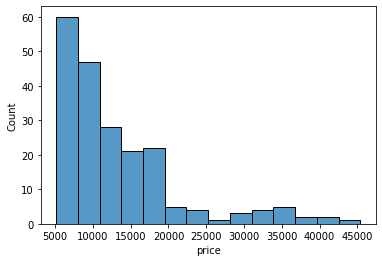

In [94]:
sns.histplot(y)

2. Логарифмирование целевой переменной (price)
Для улучшения модели и устранения проблем с распределением целевой переменной price, применили логарифмическое преобразование.

In [98]:
y_log = np.log(y)
y_log

0       9.510075
1       9.711116
2       9.711116
3       9.543235
4       9.767095
         ...    
200     9.731809
201     9.854560
202     9.975110
203    10.019936
204    10.026811
Name: price, Length: 205, dtype: float64

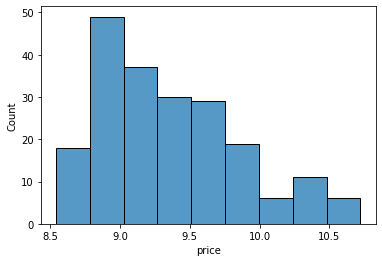

In [99]:
sns.histplot(y_log)

Результат:
		Гистограмма до преобразования показывает, что price не имеет нормального распределения.
		После логарифмирования распределение стало более симметричным.

3. Обучение новой модели на логарифмированных данных
Мы обучили модель на новой целевой переменной (log(price)).

In [100]:
model_log = sm.OLS(y_log, X).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     75.83
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           8.09e-87
Time:                        15:12:02   Log-Likelihood:                 174.62
No. Observations:                 205   AIC:                            -253.2
Df Residuals:                     157   BIC:                            -93.74
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.63

Основные результаты:
		R-squared = 0.95: Модель объясняет 95% изменчивости логарифма цены. Это гораздо выше, чем у предыдущих моделей.
		Коэффициенты предикторов: После логарифмирования влияние предикторов стало более интерпретируемым и значимым.

Заключение
		Решение мультиколлинеарности: Признаки с высоким VIF нужно исключить или трансформировать.
		Логарифмирование целевой переменной: Улучшает распределение и качество модели.
		Финальная модель: Модель с логарифмированной price и решенной мультиколлинеарностью показывает лучшие результаты.